In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
import re
import networkx as nx
import seaborn as sns
import netrd
import os
from scipy import stats
from sklearn.linear_model import LinearRegression
from itertools import *
from helper import *
from main import *
from matplotlib import colors

In [2]:
API_URL = "http://134.76.24.67/node" 
base = os.path.dirname(os.getcwd())

In [3]:
# get navigation actions
r = requests.get(API_URL+"/navigation")
print("Status:", r.status_code)
pd_data = []
navigation = json.loads(r.text)
for a in navigation:
  # print(a)
  record = [a["session_id"], a["stim_left"], a["stim_right"], a["solution"], a["selected"], a["trial"], a["show_length"]]
  pd_data.append(record)
    
navigation_df = pd.DataFrame(pd_data, columns=['session_id', 'stim_left', 'stim_right', 'solution', 'selected', 'trial', 'show_length'])
navigation_df.head()

Status: 200


,session_id,stim_left,stim_right,solution,selected,trial,show_length
0,1130,1,3,"4,0","4,0",0,NaN
1,1130,1,5,"4,3,0,2",4,1,NaN
2,1130,3,0,"4,1",2,2,NaN
3,1130,5,1,"0,2,3","5,2,1",3,NaN
4,1130,5,1,"3,0,2,4","1,0",4,NaN


In [8]:
ids = [1195,1197,1199,1203,1204,1210,1211,1214,1215,1223]
#,1234,1236,1238,1239,1243,1244,1248,1249,1251,1258,1259]


Session  1195


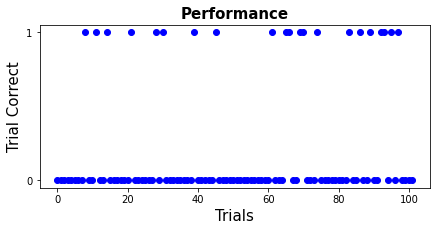


Session  1197


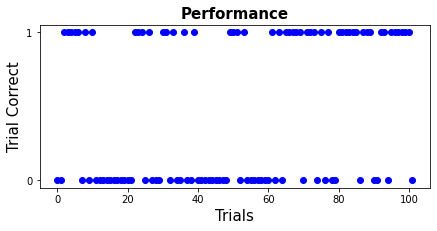


Session  1199


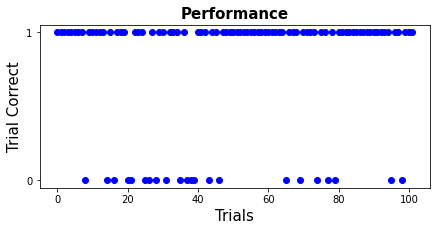


Session  1203


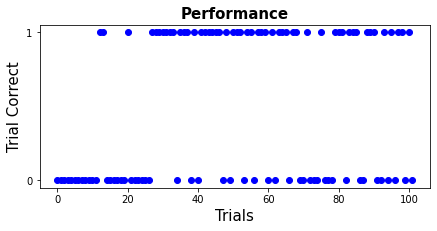


Session  1204


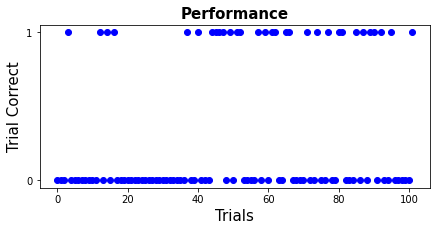


Session  1210


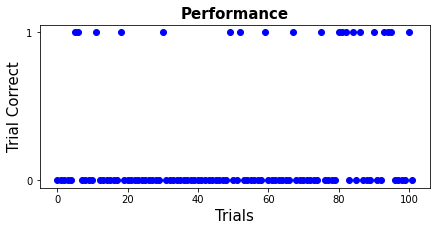


Session  1211


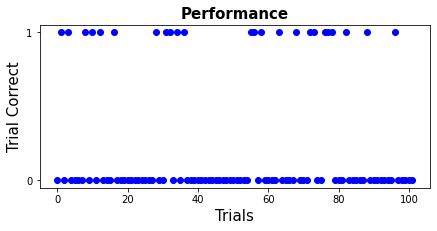


Session  1214


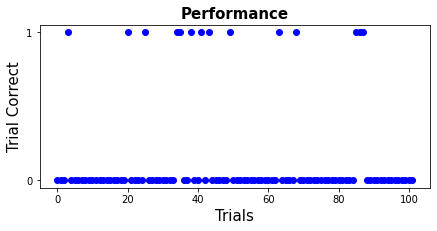


Session  1215


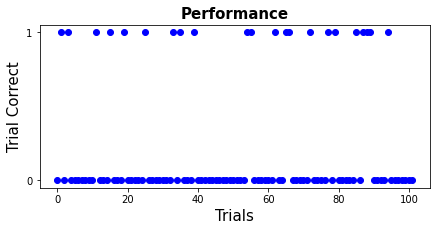


Session  1223


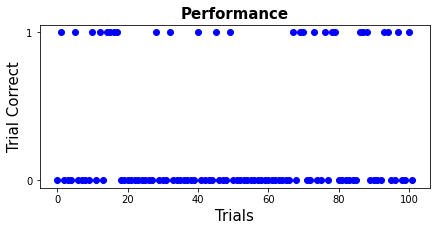

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
n_split = 6
n_trials_assoc = 150

mean_nav = np.zeros((np.size(ids,0),n_split))

mean_ass_debrief = np.zeros((np.size(ids,0)))

sess_split_t = np.arange(0,n_trials_assoc,n_trials_assoc/n_split).astype(int)

step_size_t = int(n_trials_assoc/n_split)

subj_count = 0
for session_id in ids: 

  print("\nSession ", session_id)

  trials = navigation_df[navigation_df['session_id'] == session_id]

  solution = trials["solution"].to_numpy()

  selected = trials["selected"].to_numpy()

  idx_corr = solution==selected

  correct_trls = np.zeros_like(idx_corr)

  correct_trls[np.where(idx_corr==True)[0]] = 1

  split_count = 0
  for idx_split in sess_split_t:
    if idx_split == sess_split_t[-1]:
      mean_nav[subj_count,split_count] = np.mean(correct_trls[idx_split:])
    else:
      mean_nav[subj_count,split_count] = np.mean(correct_trls[idx_split:idx_split+step_size_t])
    split_count += 1

  # # Association learning
  # trials_assoc = association_df[association_df['session_id'] == session_id]

  # BB_shown             = trials_assoc["building_block_id"].to_numpy()
  # target               = trials_assoc["target"].to_numpy()
  # pressed              = trials_assoc["pressed"].to_numpy()
  # building_block_shown = trials_assoc["building_block_shown"].to_numpy()
  # target_is_bb         = trials_assoc["target_is_bb"].to_numpy()

  # correct_assoc = []
  # for trls in np.arange(len(BB_shown)):
  #   if (BB_shown[trls]==target[trls] and building_block_shown[trls]==target_is_bb[trls]):
  #     correct_assoc.append(pressed[trls])

  # # Association Debrief
  # # association_debriefing_df = pd.DataFrame(pd_data, columns=['session_id', 'trial', 'target', 'selected'])
  # trials_assoc_debrief = association_debriefing_df[association_debriefing_df['session_id'] == session_id]
  # target               = trials_assoc_debrief["target"].to_numpy()
  # selected             = trials_assoc_debrief["selected"].to_numpy()

  # idx_corr = target==selected

  # correct_assoc_debrief = np.zeros_like(idx_corr)

  # correct_assoc_debrief[np.where(idx_corr==True)[0]] = 1

  # mean_ass_debrief[subj_count] = np.mean(correct_assoc_debrief)

  plt.rcParams['figure.figsize'] = [7, 3]
  plt.plot(correct_trls,'bo')
  plt.yticks([0,1])
  plt.xlabel("Trials", fontsize=15)
  plt.ylabel("Trial Correct", fontsize=15)
  plt.title("Performance", fontsize=15, fontweight="bold")
  plt.show()

  subj_count += 1

print(mean_ass_debrief)

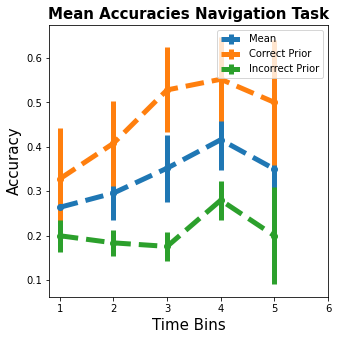

In [10]:
## plot diff between conditions over time
X_axis_t = np.arange(0,len(sess_split_t))

plt.rcParams['figure.figsize'] = [5, 5]

data = mean_nav
se = np.divide(np.std(data,0),np.sqrt(np.size(data,0)))
plt.errorbar(X_axis_t, np.mean(data,0), yerr=se, 
             linewidth=5, fmt='o--', label = "Mean")

data = mean_nav[:5,:]
se = np.divide(np.std(data,0),np.sqrt(np.size(data,0)))
plt.errorbar(X_axis_t, np.mean(data,0), yerr=se, 
             linewidth=5, fmt='o--', label = "Correct Prior")

data = mean_nav[5:,:]
se = np.divide(np.std(data,0),np.sqrt(np.size(data,0)))
plt.errorbar(X_axis_t, np.mean(data,0), yerr=se, 
             linewidth=5, fmt='o--', label = "Incorrect Prior")


plt.xticks(X_axis_t, np.arange(1,n_split+1))
plt.xlabel("Time Bins", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Mean Accuracies Navigation Task", fontsize=15, fontweight="bold")
plt.show()